<a href="https://colab.research.google.com/github/Leon-S-Sekiya/h.lab/blob/main/tanyao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

データおよびライブラリのロード

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
iris = load_iris()
list(iris.target_names)
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

TensorFlowとKeras
Versionの確認

In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
tf.random.set_seed(1)

2.7.0


データの分割

In [ ]:
import random

乱数のシード固定、idxrという名のリスト作成、シャッフル

In [ ]:
import random
random.seed(12345)
Ndata = len(iris.data)
print(f"Ndata={Ndata}")
idxr = [k for k in range(Ndata)]
print(idxr) #0～149まで順番が正しく出ているかチェック
random.shuffle(idxr)
print(idxr) #順番が出鱈目になっているかチェック

Ndata=150
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
[109, 78, 108, 60, 93, 46, 14, 59, 118, 8, 18, 96, 77, 62, 104, 25, 99, 133, 130, 82, 80, 148, 17, 4, 34, 101, 33, 81, 126, 61, 28, 89, 132, 79, 9, 68, 64, 54, 149, 35, 26, 136, 70, 140, 40, 57, 120, 39, 30, 119, 139, 113, 102, 103, 86, 45, 72, 114, 50, 11, 122, 51, 24, 10, 56, 7, 6, 117, 124, 145, 112, 121, 144, 137, 91, 128, 1, 38, 21, 92, 16, 1

上記により、ランダムな番号での呼び出しが可能となった。
いよいよデータ分割である。

In [ ]:
Ndata_train = int(Ndata*0.5)#分割の割合を指定。
print(f"# of training data = {Ndata_train}")
print(f"# of validation data = {Ndata-Ndata_train}")
train_data = iris.data[idxr[:Ndata_train]]#訓練データ
train_labels = iris.target[idxr[:Ndata_train]]#訓練データの教師ラベル

val_data = iris.data[idxr[Ndata_train:]]#検証データ
val_labels = iris.target[idxr[Ndata_train:]]#検証データの教師ラベル

# of training data = 75
# of validation data = 75


ニューラルネットワークの設計

4次元のデータから3次元のラベルへの写像を創る。
* 中間層：1層
* ユニット数:10

KerasのSequentialを使って引数を設定し、インスタンスを作成する。

In [ ]:
model = keras.Sequential([
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(3, activation='softmax')               
])

学習
トレーニングの設定。勾配法を使う。
optimizer='SGD'と指定する。
Adamなどを指定すると得られる誤差関数の履歴が変わる(要検証)
クロスエントロピーを選択。

In [ ]:
model.compile(optimizer='SGD',
        loss = 'sparase_categorical_crossentropy',
        metrics = ['accuracy'])#分類の精度を評価

実際の学習には、modelの関数であるfitを使えばよい。

訓練データと訓練データのラベルが必須。今回は検証データもつける。

学習は20エボック(訓練データ全体を20回使ってトレーニング)

ミニパッチのサイズを7つ(=75/10)

上記の数字をなぜそう設定したのか分かっていない。

In [ ]:
model = ...  # Get model (Sequential, Functional Model, or Model subclass) model.save('path/to/location')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_iris
import random
random.seed(12345)
Ndata = len(iris.data)
print(f"Ndata={Ndata}")
idxr = [k for k in range(Ndata)]
print(idxr) #0～149まで順番が正しく出ているかチェック
random.shuffle(idxr)
print(idxr) #順番が出鱈目になっているかチェック
Ndata_train = int(Ndata*0.5)#分割の割合を指定。
print(f"# of training data = {Ndata_train}")
print(f"# of validation data = {Ndata-Ndata_train}")
train_data = iris.data[idxr[:Ndata_train]]#訓練データ
train_labels = iris.target[idxr[:Ndata_train]]#訓練データの教師ラベル

val_data = iris.data[idxr[Ndata_train:]]#検証データ
val_labels = iris.target[idxr[Ndata_train:]]#検証データの教師ラベル
model = keras.Sequential([
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(10, activation='relu'),
        keras.layers.Dense(3, activation='softmax')               
])
model.compile(optimizer='SGD',
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy'])#分類の精度を評価
training_history = model.fit(train_data,train_labels,
        validation_data = (val_data, val_labels),
        epochs = 20,
        batch_size = Ndata_train//10,
        verbose = 1)

Ndata=150
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
[109, 78, 108, 60, 93, 46, 14, 59, 118, 8, 18, 96, 77, 62, 104, 25, 99, 133, 130, 82, 80, 148, 17, 4, 34, 101, 33, 81, 126, 61, 28, 89, 132, 79, 9, 68, 64, 54, 149, 35, 26, 136, 70, 140, 40, 57, 120, 39, 30, 119, 139, 113, 102, 103, 86, 45, 72, 114, 50, 11, 122, 51, 24, 10, 56, 7, 6, 117, 124, 145, 112, 121, 144, 137, 91, 128, 1, 38, 21, 92, 16, 1

結果を評価していく。

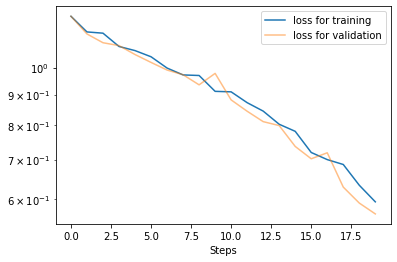

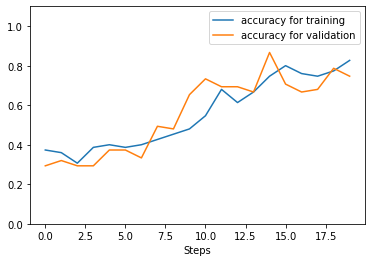

In [ ]:
import matplotlib.pyplot as plt
y = training_history.history['loss']
x = range(len(y))
plt.semilogy(x,y,label = "loss for training")
#
y = training_history.history['val_loss']
x = range(len(y))
plt.semilogy(x,y,label = "loss for validation",alpha = 0.5)
#
plt.legend()
plt.xlabel("Steps")
plt.show()
#----
y = training_history.history['accuracy']
x = range(len(y))
plt.plot(x,y,label = "accuracy for training")
y = training_history.history['val_accuracy']
x = range(len(y))
plt.plot(x,y,label = "accuracy for validation")
plt.legend()
plt.xlabel("Steps")
plt.ylim(0,1.1)
plt.show()